In [1]:
import pandas as pd
import os

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
abs_2021 = pd.read_csv('../data/curated/2021ABS_csv')



In [38]:
features = [
    'Estimated resident population (no.)',
    'Population density (persons/km2)',
    'Median age - persons (years)',
    'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
    'Health care and social assistance (no.)','Financial and insurance services (no.)',
    'Administrative and support services (no.)','Education and training (no.)',
    'Accommodation and food services (no.)','Public administration and safety (no.)',
    'Value of residential building ($m)', 'Houses - total (no.)', 
    'Townhouses - total (no.)', 'Apartments - total (no.)', 'Rented (no.)',
    'Count of homeless persons (no.)','Used at least one form of public transport (train, tram, bus, ferry) (no.)',
    'Median weekly household rental payment ($)', 'Median equivalised total household income (weekly) ($)'
]



In [39]:
abs_features = abs_2021[features]
abs_features = abs_features.dropna(axis=0).reset_index(drop=True)
rent = abs_features['Median weekly household rental payment ($)']
abs_features = abs_features.drop(['Median weekly household rental payment ($)'], axis=1)

In [41]:
for i in range(1, 20):    
    test = SelectKBest(score_func=f_classif, k=i)
    fit = test.fit(abs_features, rent)

    # Summarize scores
    np.set_printoptions(precision=3)
    #print(fit.scores_)

    new_features = fit.transform(abs_features)

    new_features.shape


    mask = fit.get_support() #list of booleans
    best_features = [] # The list of your K best features

    for bool_val, feature in zip(mask, features):
        if bool_val:
            best_features.append(feature)

    best_features
    X_train, X_test, y_train, y_test = train_test_split(new_features, rent, test_size = 0.2, random_state=20037)

    lr = LinearRegression().fit(X_train, y_train)

    print(i, ':', lr.score(X_test, y_test), '\n')



1 : 0.3758334299369305 

2 : 0.4503007497480628 

3 : 0.5529046301078329 

4 : 0.649744886030948 

5 : 0.7048303430875835 

6 : 0.686261209316243 

7 : 0.7199704586289781 

8 : 0.7224765359781368 

9 : 0.736230736266075 

10 : 0.7410648117284774 

11 : 0.752896636922525 

12 : 0.7436627503719038 

13 : 0.6658865648815688 

14 : 0.6395542035910757 

15 : 0.6073649843903399 

16 : 0.6088893966125838 

17 : 0.6051389715167752 

18 : 0.6071155242104164 

19 : 0.6118748695505998 



In [31]:
test = SelectKBest(score_func=f_classif, k=11)
fit = test.fit(abs_features, rent)

# Summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)

new_features = fit.transform(abs_features)

new_features.shape


mask = fit.get_support() #list of booleans
best_features = [] # The list of your K best features

for bool_val, feature in zip(mask, features):
    if bool_val:
        best_features.append(feature)

best_features
X_train, X_test, y_train, y_test = train_test_split(new_features, rent, test_size = 0.2, random_state=20037)

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_test, y_test))


0.752896636922525


In [44]:
best_features

['Estimated resident population (no.)',
 'Population density (persons/km2)',
 'Median age - persons (years)',
 'Working age population (aged 15-64 years) (no.)',
 'Renter (no.)',
 'Health care and social assistance (no.)',
 'Financial and insurance services (no.)',
 'Administrative and support services (no.)',
 'Education and training (no.)',
 'Accommodation and food services (no.)',
 'Public administration and safety (no.)',
 'Value of residential building ($m)',
 'Houses - total (no.)',
 'Townhouses - total (no.)',
 'Apartments - total (no.)',
 'Rented (no.)',
 'Count of homeless persons (no.)',
 'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
 'Median weekly household rental payment ($)']

In [32]:
for i in range(len(best_features)):
    print(best_features[i], '=', lr.coef_[i], '\n')


Estimated resident population (no.) = 0.004423347412548766 

Median age - persons (years) = 4.537628796957182 

Working age population (aged 15-64 years) (no.) = 0.004025961584730453 

Renter (no.) = -0.31878218564980537 

Health care and social assistance (no.) = 0.082811658133125 

Houses - total (no.) = -0.019480080366152563 

Townhouses - total (no.) = -0.018780251486716137 

Apartments - total (no.) = -0.021973538851708274 

Rented (no.) = 0.017327997267167383 

Count of homeless persons (no.) = -0.09104024938183677 

Median weekly household rental payment ($) = 0.11366420097488657 



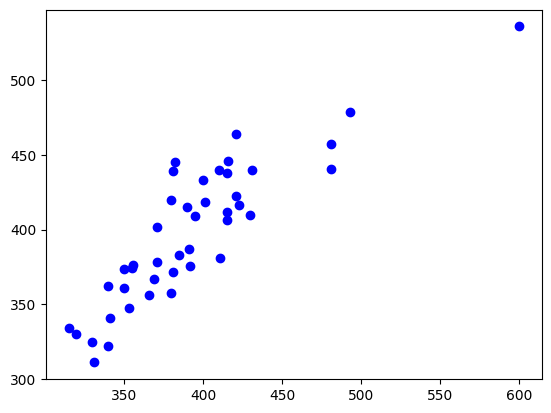

In [22]:
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred, color ='b')


In [28]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 20.34414377737274
MSE: 661.2985815627601
RMSE: 25.71572634717441
